<a href="https://colab.research.google.com/github/vedanthshenoy/Telecom-Churn-and-Customer-Clustering/blob/main/predicting_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('customerdata.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
target=data[['Churn']]
target.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
target=le.fit_transform(target)
target=pd.DataFrame(target,columns=['target'])
target.head()

,target
0,0
1,0
2,1
3,0
4,1


In [ ]:
data.drop(['customerID','TotalCharges','Churn'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [ ]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
enc_data=list(cat_cols)
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


In [ ]:
data.shape

(7043, 18)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=50)

print("x train shape : ",x_train.shape)
print("x test shape : ",x_test.shape)
print("y train shape : ",y_train.shape)
print("y test shape : ",y_test.shape)

x train shape :  (4930, 18)
x test shape :  (2113, 18)
y train shape :  (4930, 1)
y test shape :  (2113, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings

model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("Accuracy of the model is : ",accuracy_score(pred,y_test)*100)
warnings.filterwarnings("ignore")

Accuracy of the model is :  77.23615712257454


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(n_estimators=100)
model.fit(data,target)
k=model.feature_importances_
print(k)

[0.04131004 0.02715621 0.03255644 0.02560429 0.2096078  0.00704032
 0.02931537 0.03226556 0.04770517 0.03329473 0.0313109  0.04106065
 0.02326473 0.02426655 0.09199254 0.03096276 0.0731769  0.19810903]


Feature Importances

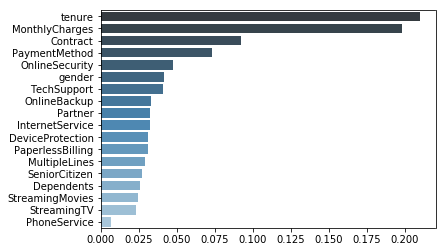

In [ ]:
import seaborn as sns
imp = pd.Series(k, index=data.columns).sort_values(ascending=False)
sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')